In [1]:
from glob import glob as gg
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from matplotlib import rc as rc
#
from netCDF4 import Dataset  
# 
from scipy.signal import find_peaks as fp
from scipy.io import loadmat
#
import pandas as pd
#
from datetime import datetime

In [5]:
#
# load time properties
#
class REcoM_time:
    def __init__(self):
        # load time properties
        self.estimate_time_axis()
    def estimate_time_axis(self):
        path_obs = '/home/fbirrien/NuArctic/nuarctic/REcoM1D/config/'
        filename = path_obs + 'time.recom'
        # read data 
        with open(filename) as f:
            lines = f.readlines()
        for l in lines:
            tmp = l.replace(' ','').replace('\t','').split('=')[-1].strip()
            if 'start_date' in l:
                date_start = datetime.strptime(tmp,'%d-%m-%Y').toordinal()
            elif 'end_date' in l:
                date_end = datetime.strptime(tmp,'%d-%m-%Y').toordinal()
            elif 'dt' in l:
                dt = float(tmp)/24.
            elif 'spinup' in l:
                spinup = int(tmp)
        self.date_start, self.date_end = np.copy(date_start), np.copy(date_end)
        date_start = date_start - spinup
        
        # create time axis
        npt = int(abs(date_end - date_start)/dt)
        self.dates = np.linspace(date_start, date_end, npt+1)        
#
time = REcoM_time()

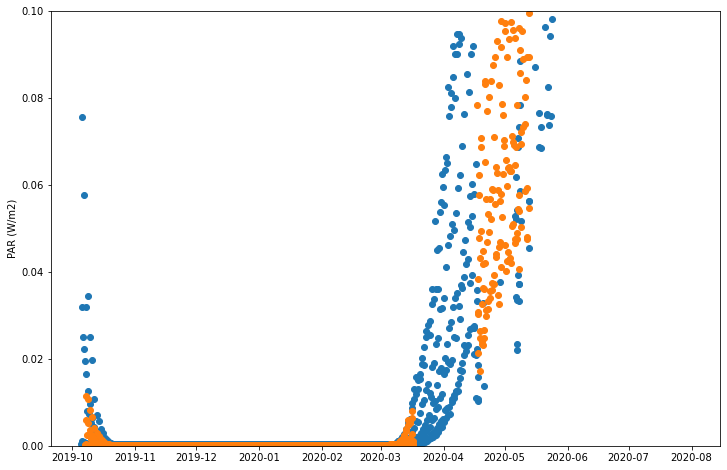

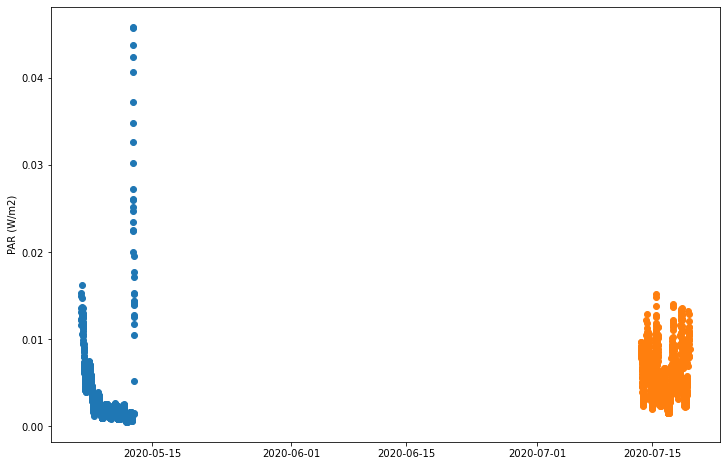

In [21]:

# load ITP_PAR data
class PAR_data:
    def __init__(self, filename):
        self.read_ocean_data(filename)
    def read_ocean_data(self, filename):
        # load csv files
        data = pd.read_csv(filename,skipinitialspace=True, usecols=[0,4])
        D, P = data.iloc[:,0], data.iloc[:,1]
        # dates
        dates=[]
        for dt in D:
            day = datetime.strptime(dt, '%Y-%m-%dT%H:%M:%S').toordinal()
            hour = float(dt.split('T')[-1].split(':')[0])/24.
            dates.append(day+hour)
        self.dates = np.asarray(dates)
        # PAR
        self.PAR = P
        
#
dtrp = datetime.strptime('19700101','%Y%m%d').toordinal()
path_obs = '/home/fbirrien/Data/Observations/MOSAiC/buoys/mosaic_buoy_data/'
filelist = sorted(gg(path_obs+'*RAMSES_trans_irrad*'))
#PAR=[]
fig1, ax1 = plt.subplots(1, figsize=(12,8))
fig2, ax2 = plt.subplots(1, figsize=(12,8))

for i,fl in enumerate(filelist):
    # load PAR data
    PAR = PAR_data(fl)
    # plots
    if i<2:
        ax1.plot_date(PAR.dates-dtrp, PAR.PAR)
    else:
        if i==len(filelist)-1:
            ax2.plot_date(PAR.dates-dtrp, PAR.PAR/1000)
        else:
            ax2.plot_date(PAR.dates-dtrp, PAR.PAR)    
    
    ax1.set_ylabel('PAR (W/m2)'), ax1.grid(), ax1.set_ylim([0,0.1])
    ax2.set_ylabel('PAR (W/m2)'), ax2.grid(), #ax2.set_ylim([0,0.1])



In [ ]:
# remarks:
# pb different instrument with different time discretization and availability (how to merge the product)
# PAR is provided a multiple time per day as a time series (surface?)
# can we reconstruct the PAR in space (vertical) and time by fitting by modulated sinusoidal?  